# Lab 07-2 linear regression(without min/max)

* linear regression에 대한 설명 (Data에 대한 표준화나 정규화 없이 수행)

### 기본 Library 선언 및 Tensorflow 버전 확인

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, Input

tf.random.set_seed(0)   # for reproducibility
print(tf.__version__)

2.12.0


### 강의에 설명할 Data입니다
* X Data(feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의 되고 Y Data(label)는 해당 배열의 마지막 값을 정의(5번째 값)

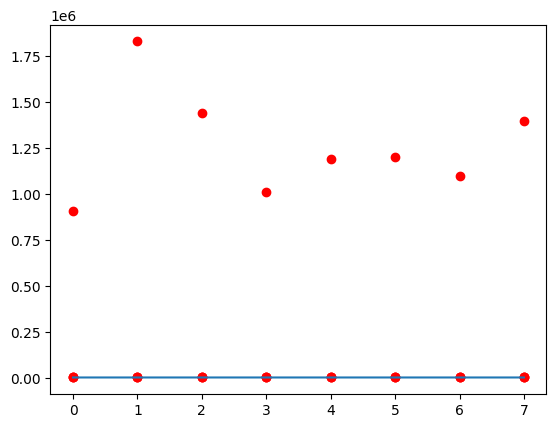

In [55]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


##  Tensorflow 실행
### 위 Data를 기준으로 Linear Regression 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [56]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

features, labels = iter(dataset).get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [48]:
W = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

In [49]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

* 가설을 검증할 Cost 함수를 정의합니다(Mean Square Error를 사용)

In [57]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

In [58]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

* GradientDescentOptimizer로 학습 실행

In [59]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=1e-5)
# optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=1e-5)

### Tensorflow를 통한 실행을 위해 Session을 실행합니다.

In [64]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: inf
Iter: 10, Loss: nan
Iter: 20, Loss: nan
Iter: 30, Loss: nan
Iter: 40, Loss: nan
Iter: 50, Loss: nan
Iter: 60, Loss: nan
Iter: 70, Loss: nan
Iter: 80, Loss: nan
Iter: 90, Loss: nan
Iter: 100, Loss: nan
